<a href="https://colab.research.google.com/github/danteacosta/data_science/blob/master/An%C3%A1lise_da_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Rio de Janeiro" width="40%" src="https://github.com/danteacosta/data_science/blob/master/imagens/canival-da-celebracao-brasileira-do-rio-com-ilustracao-de-corcovade-christ_24908-62390.jpg?raw=1">

# Analisando a Violência no Rio de Janeiro

Apesar de praticamente todo o Brasil sofrer com a criminalidade, existem estados que infelizmente estão em maior evidência nos veículos de comunicação quando se trata dessa problemática, como o Rio de Janeiro, um dos mais populosos, importantes economicamente do país e influentes na política. Diante disso, resolvi abordar a questão a partir de uma visão mais estatística, com informações que vão desde janeiro de 1991 até agosto de 2019.

## Obtenção dos Dados

Os dados utilizados foram disponibilizados pelo Instituto de Segurança Pública do Rio de Janeiro no [portal ISPDados](http://www.ispdados.rj.gov.br/). Essa informação é obtida majoritariamente através dos Registros de Ocorrência emitidos pelas delegacias da Polícia Civil do Estado do Rio de Janeiro com um complemento feito por alguns órgãos da Polícia Militar.

Posteriormente, a Corregedoria Interna da Polícia Civil analisa essas informações como forma de assegurar a qualidade dos dados. Todas as informações são baseadas na data que o Registro de Ocorrência foi feito, não necessariamente quando aconteceu a ocorrência.

O *dataset* utilizado é resultado de um pré-processamento do arquivo disponibilizado, com objetivo de focar mais na análise. Caso você tenha interesse por ele, clique [aqui]('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv').

### Importando os dados e bibliotecas


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

## Análise Inicial dos Dados

Para entender melhor como está a informação, vamos olhar alguns aspectos com relação ao preenchimento do *dataset*, como seu tamanho, variáveis e seus respectivos tipos, algumas entradas e se há valores faltantes.

In [ ]:
#Formato do DataFrame
df.shape

(344, 56)

Em resumo, temos 344 entradas de dados, correspondente a cada mês e 56 variáveis, relativas a tipos de ocorrência, no DataFrame analisado.

In [ ]:
#Colunas/variáveis presentes
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

De forma geral, temos `vano`  e `mes` como indicadores temporais de ano e mês respectivamente e todas as outras colunas se referem à contagem de cada tipo de ocorrência. Existem algumas siglas não tão intuitivas, então resolvi expor as que precisei pesquisar.
* `AAAPAI`- Auto de Apreensão de Adolescente Por Ato Infracional
* `APF`- Auto de Prisão em Flagrante


In [ ]:
#Vendo o tipo de cada coluna e a contagem de valores preenchidos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vano                        344 non-null    int64  
 1   mes                         344 non-null    int64  
 2   hom_doloso                  344 non-null    int64  
 3   lesao_corp_morte            248 non-null    float64
 4   latrocinio                  344 non-null    int64  
 5   hom_por_interv_policial     260 non-null    float64
 6   tentat_hom                  344 non-null    int64  
 7   lesao_corp_dolosa           344 non-null    int64  
 8   estupro                     200 non-null    float64
 9   hom_culposo                 260 non-null    float64
 10  lesao_corp_culposa          248 non-null    float64
 11  roubo_comercio              344 non-null    int64  
 12  roubo_residencia            344 non-null    int64  
 13  roubo_veiculo               344 non

É possível verificar que todos os valores de variável são numéricos, `int` ou `float`. Além disso, já podemos verificar a ausência de alguns valores, visto que nem toda coluna possui 344 valores não-nulos, total de entradas no arquivo. 

In [ ]:
#Verificando as 5 primeiras entradas
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [ ]:
#Verificando as 5 últimas entradas
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


Já nas primeiras entradas vemos que muitos valores não estão registrados, tal ausência já não acontece quando olhamos no final do *dataset*, eis algumas hipóteses sobre essa constatação.

*   Como existe um intervalo consideravelmente extenso de anos, 28 no total, talvez informações mais detalhadas não fossem contabilizadas e com o passar dos anos houve um detalhamento maior dos ocorridos.
*   Se considerarmos que muita informação estava em papéis e foram ao longo desse período sendo digitalizadas, existe uma possibilidade de essa informação ter se perdido durante esse processo.




In [ ]:
#Vendo percentualmente a ausência de dados em cada coluna do maior para o menor
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Nota-se que informações como roubos de bicicleta e ocorrências relacionadas a drogas são consideravelmente faltantes, enquanto outras como o total de furtos ou homicídios estão totalmente preenchidas, o que fortalece a ideia de um detalhamento maior com o passar dos anos.

## Informações Estatísticas da Violência no Rio de Janeiro

Como existem categorias consideravelmente diversas, que vão desde automóveis, drogas e homicídios, optei por dividir o estudo em algumas frentes que foram mais preenchidas, pois dados menos presentes implicariam em uma manipulação maior de informações e esse é um estudo mais simples. Para entendermos melhor como esses números estão distribuídos, vamos fazer um resumo estatístico a seguir.


In [ ]:
#Resumo estatístico para análise preliminar
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

### Dados de veículos no Rio de Janeiro
Crimes contra o patrimônio, mais especificamente veículos, são um tanto comuns nos centros urbanos de todo o país. Dessa forma, vamos buscar ter uma noção da frequência deles no Rio de Janeiro e analisar também o quanto eles são perdidos definitivamente a partir do seguinte critério.

Ao ter informações de recuperação, podemos dividí-la pelo total de ocorrências tanto de furto como de roubo para ter uma noção percentual da situação.

In [ ]:
#Média de veículos roubados por mês
media_roubo=df.roubo_veiculo.mean()
media_roubo

2448.6976744186045

Temos aproximadamente 2449 ocorrências de roubo de veículo por mês 

In [ ]:
#Média de veículos furtados por mês
media_furto=df.furto_veiculos.mean()
media_furto

1674.671511627907

E aproximadamente 1675 casos de furtos de veículo por mês

In [ ]:
#Média de veículos recuperados por mês
media_recuperados=df.recuperacao_veiculos.mean()
media_recuperados

1772.2383720930231

São aproximadamente 1772 registros de recuperações por mês

In [ ]:
#Calculando a partir dessas médias a porcentagem de recuperação
porcentagem_recuperados=media_recuperados/(media_furto+media_roubo)
porcentagem_recuperados*100

42.980346705075085

Temos apenas 43% de recuperação de veículos, após uma pesquisa e comparação com outros estados do país, vi que o número é um pouco abaixo dos demais.

### Homicídios no estado
Crimes contra a vida são uns dos mais graves dentre essas categorias, vamos às ocorrências máximas e mínimas entre os meses registrados.


In [ ]:
# valores max e min de hom_doloso
max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()

# Mostrando os valores máximos e mínimos
print("Min:\t{}".format(min_hom_doloso))
print("Max:\t{}".format(max_hom_doloso))

Min:	272
Max:	831


Podemos também ver o mês que aconteceu o maior número(831) e o menor também(272).

In [ ]:
#Vendo o mês com menos casos
df[df.hom_doloso==272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [ ]:
#Vendo o mês com mais casos
df[df.hom_doloso==831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


Vemos que o pior mês nesse aspecto foi janeiro de 1995 e o melhor foi junho de 2015. Possivelmente isso significa uma certa melhora a ser analisada mais adiante.

### Apreensão de drogas
Frequentemente vemos notícias sobre esse tipo de acontecimento, principalmente nas favelas fluminenses. Vamos então repetir o procedimento dos homicídios com as apreensões.

In [ ]:
# valores max e min de hom_doloso
max_apreensao_drogas = df.apreensao_drogas.max()
min_apreensao_drogas = df.apreensao_drogas.min()

# Mostrando os valores máximos e mínimos
print("Min:\t{}".format(min_apreensao_drogas))
print("Max:\t{}".format(max_apreensao_drogas))

Min:	80
Max:	2543


Repetindo a ideia de descobrir os meses de máxima e mínima para esse tipo de ocorrência

In [ ]:
#Vendo o mês com menos casos
df[df.apreensao_drogas==80]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3


In [ ]:
#Vendo o mês com mais casos
df[df.apreensao_drogas==2543]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
294,2015,7,306,2.0,9,61.0,484,5711,427.0,146.0,3399.0,595,96,2425,542,4844,602,1,3.0,964.0,8.0,98.0,24.0,1167,11369,1381,2856,852.0,1488.0,220.0,7484,14281,0.0,183.0,11.0,3146.0,2543,1122.0,1230.0,231.0,1905,3028.0,842.0,1802.0,83.0,5917.0,498.0,38,2.0,2.0,0.0,378,6410,2425,63135.0,3


Vemos uma situação oposta à dos homicídios, pois a ocasião com menos casos foi em 1991 e a maior foi mais recente, no ano de 2015. Tanto podemos pensar que isso decorre de um aumento da atuação policial como também do aumento da circulação de narcóticos.

## Visualização de Dados

Números são pouco didáticos em muitos casos e humanos tendem a ser mais visuais, vamos usar utilizar gráficos que facilitem o entendimento de situações como por exemplo os homicídios no estado. A seguir está um histograma de `hom_doloso` na horizontal e na vertical o número de meses que esses números se repetem.


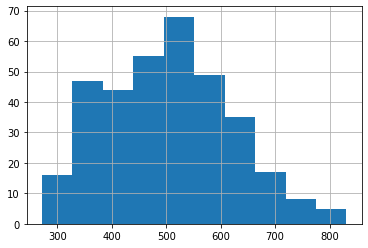

In [ ]:
#Histograma de homicídios dolosos
df.hom_doloso.hist()

Algumas observações a partir dos gráficos:

*   Em quase 70 dos 344 meses registrados tivemos aproximadamente 500 homicídios.
*   Em menos de 10 meses obtivemos ao redor de 800 casos registrados para esse tipo de ocorrência.
*   No outro extremo, obtivemos pouco mais de 10 meses com até 300 casos.










Já aqui, temos gráficos com as variaveis `hom_doloso`,`total_furtos` e `total_roubos` respectivamente ao longo dos meses, sendo 0 o começo no ano de 1991 e os valores finais referentes aos últimos meses até agosto de 2019.

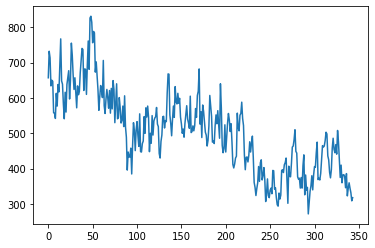

In [ ]:
#Gráfico de homicídios dolosos
df.hom_doloso.plot()

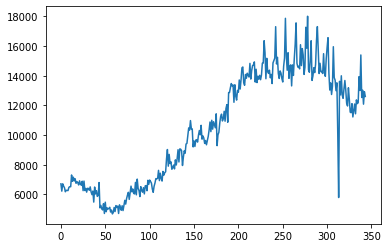

In [ ]:
#Gráfico do total de furtos
df.total_furtos.plot()

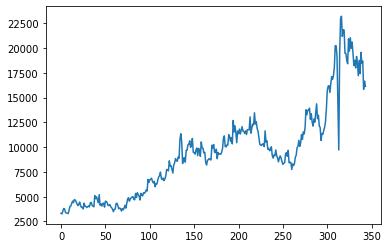

In [ ]:
#Gráfico do total de roubos
df.total_roubos.plot()

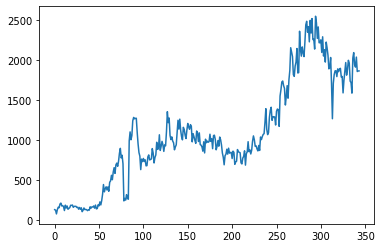

In [ ]:
#Gráfico do total de roubos
df.apreensao_drogas.plot()


*   O gráfico quanto às ocorrências de homicídio doloso mostra uma melhora, pois apesar de algumas oscilações durante esse período, houve de fato uma redução nas ocorrências.
*   A observação anterior vai de encontro com a ideia de redução observando os máximos e mínimos apresentados na seção das informações estatísticas.

*   Tanto no gráfico de furtos, como de roubos e apreensões vemos uma subida considerável no número de registros, com uma pequena redução nos últimos meses
*   Em todos esses gráficos, vemos que por volta do mês 300 há uma queda muito abrupta, o que é um forte indício  *outlier* devido à retomada também muito rápida. Possivelmente houve algum problema em relação aos registros como um todo. 






## Conclusão

De forma geral, pudemos observar que esse *dataset* não está tão completo, o que ainda é algo comum no Brasil, pois a cultura de registro dos dados e sua disponibilização não é tão comum ainda. Tratando-se de um estudo inicial, preencher os valores ausentes não é tão simples assim por estarmos lidando com algo tão complexo como políticas e seu impacto na população. Posteriormente num estudo mais aprofundado é algo a se pensar

No que se diz respeito ao que foi analisado e exposto, vimos que as ocorrências de homicídios dolosos caíram, mas o número de roubos, furtos e apreensões de entorpecentes foi na contramão ao longo desses 28 anos analisados, subindo muito apesar de algumas oscilações menores.

É interessante ter esse tipo de dado pois podemos ver a eficácia das políticas de segurança pública adotadas por governantes de uma forma mais transparente e chegar melhor a conclusões por conta própria, sem a manipulação e demagogia que vemos na Era da Pós-Verdade.